In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lab2_data.csv', sep='\t')

In [3]:
# Let's make some changes with data
score = df['churn_pred_prob'].replace(',', '.',regex=True).values
df['churn'] = np.array(df['churn'])
score = score.astype(float)

In [4]:
fpr, tpr, thresholds = roc_curve(df['churn'], score)

In [5]:
roc_auc = auc(fpr, tpr)

In [6]:
print("AUC_sklearn:", roc_auc)

AUC_sklearn: 0.787281402032421


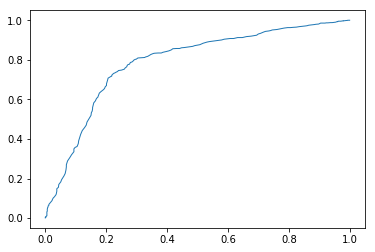

In [7]:
plt.plot(fpr, tpr, lw=1)
plt.show()

In [8]:
#Other dataset for easier AUC-calculation
data = pd.DataFrame({'churn': df['churn'], 
                     'score': score})

In [21]:
data_srt = data.sort_values(['churn', 'score'], ascending = [False, True]) #Sorting dataset by score

In [22]:
data_srt.head()

,churn,score
912,1,0.180000
942,1,0.193333
1170,1,0.206667
1241,1,0.216667
16,1,0.226667


In [23]:
TPR_n = [0] * int(len(data['churn']))
FPR_n = [0] * int(len(data['churn']))
AUC_n = 0
P = sum(data['churn'] == 1)
N = sum(data['churn'] == 0)

In [24]:
for i in range(1,len(data['churn'])):
    if data['churn'][i] == 0:
        FPR_n[i] = FPR_n[i-1] + 1/N
        TPR_n[i] = TPR_n[i-1]
        AUC_n = AUC_n + TPR_n[i]/N
    else:
        FPR_n[i] = FPR_n[i-1]
        TPR_n[i] = TPR_n[i-1] + 1/P
        

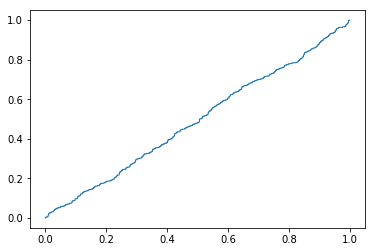

In [25]:
plt.plot(FPR_n, TPR_n, lw = 1)
plt.show()

In [19]:
print("AUC by hands:", AUC_n)

AUC by hands: 0.4912122521304086
